# Finance Data Project 

In this project I  will be analyzing some data of stock prices.

I will focus on bank stocks and see how they progressed throughout the 2007-2008 financial crisis as well as all the way up to early 2016.

** Importing libraries and setting up data **

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
import warnings
warnings.filterwarnings('ignore')

I will be analyzing stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Reading in the data and creating a separate dataframe for each bank **

In [3]:
df = pd.read_pickle('all_banks')

In [4]:
BAC = df['BAC']
C = df['C']
GS = df['GS']
JPM = df['JPM']
MS = df['MS']
WFC = df['WFC']

** Creating a list of the ticker symbols in alphabetical order **

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Concatenating the bank dataframes together to a single dataframe called bank_stocks **

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

** Setting the column name levels **

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Checking the head of the bank_stocks dataframe **

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

** Max close price for each bank's stock throughout the time period **

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Creating a new empty dataframe called returns; this dataframe will contain the returns for each bank's stock **

In [10]:
returns = pd.DataFrame()

** Using a for loop as well as the pandas pct_change() method on the close column to create a column for each bank representing this return value **

In [11]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Creating a pairplot using Seaborn of the returns dataframe **

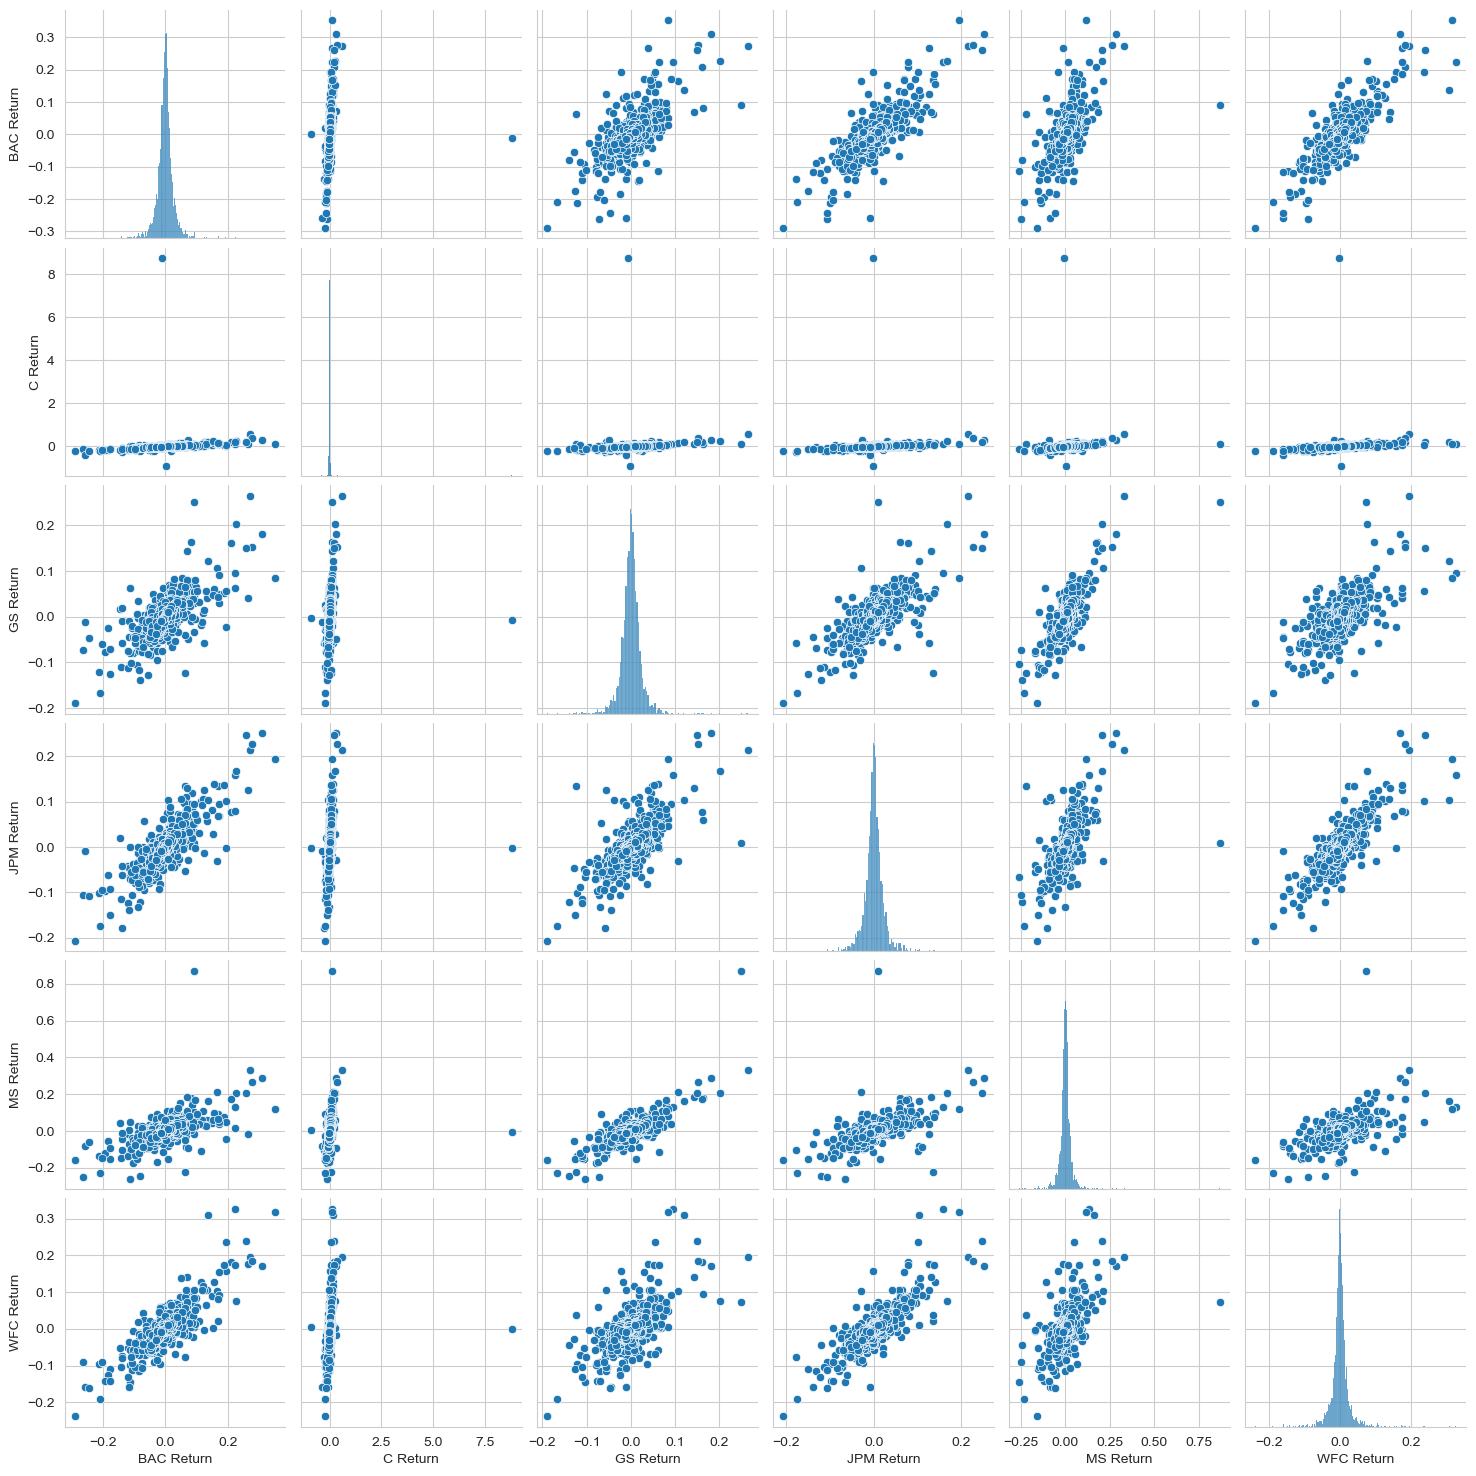

In [12]:
sns.pairplot(returns)

** Worst single day returns **

In [13]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** Best single day returns **

In [14]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Standard deviation of the returns **

In [15]:
returns.std() #Citigroup riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

** Standard deviation of the returns during 2015 only **

In [16]:
returns[returns.index.year == 2015].std() #Morgan Stanley or Bank of America riskiest, but all similar

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Creating a displot using Seaborn of the 2015 returns for Morgan Stanley **

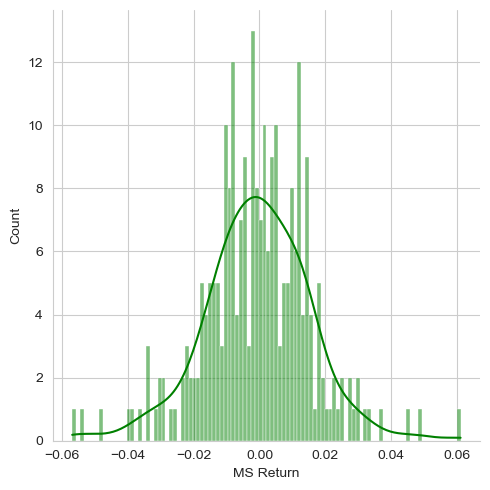

In [17]:
sns.displot(returns[returns.index.year == 2015]['MS Return'],kde=True,bins=100,color='green')

** Creating a displot using Seaborn of the 2008 returns for CitiGroup **

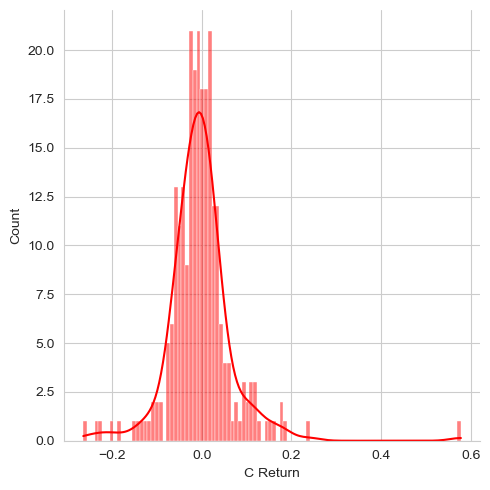

In [18]:
sns.displot(returns[returns.index.year == 2008]['C Return'],kde=True,bins=100,color='red')

** Creating a line plot showing close price for each bank for the entire index of time (using for loop) **

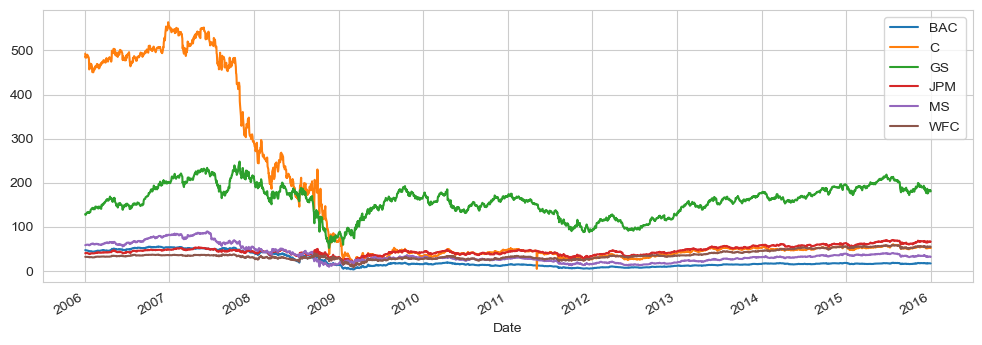

In [19]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

** Using plot() method **

<AxesSubplot:xlabel='Date'>

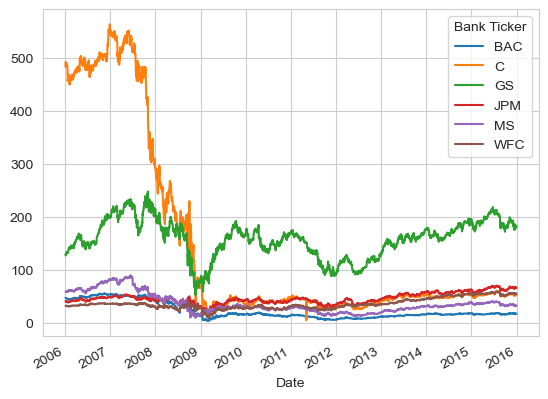

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

** Using Plotly's iplot() method **

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

** Plotting the rolling 30 day average against the close price for Bank Of America's stock for the year 2008 **

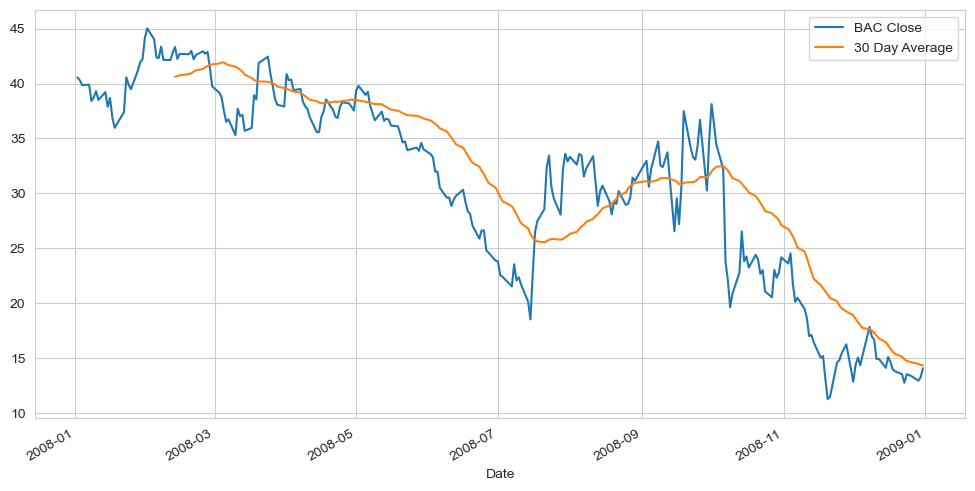

In [22]:
plt.figure(figsize=(12,6))
bank_stocks[bank_stocks.index.year == 2008]['BAC']['Close'].plot(label='BAC Close')
bank_stocks[bank_stocks.index.year == 2008]['BAC']['Close'].rolling(window=30).mean().plot(label='30 Day Average')
plt.legend()

** Creating a heatmap of the correlation between the stocks close price **

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

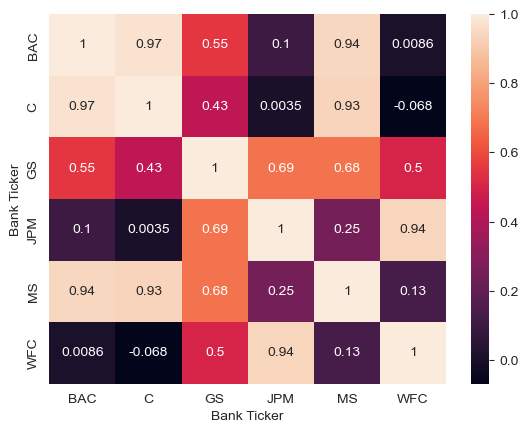

In [23]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Creating a clustermap to cluster the correlations together **

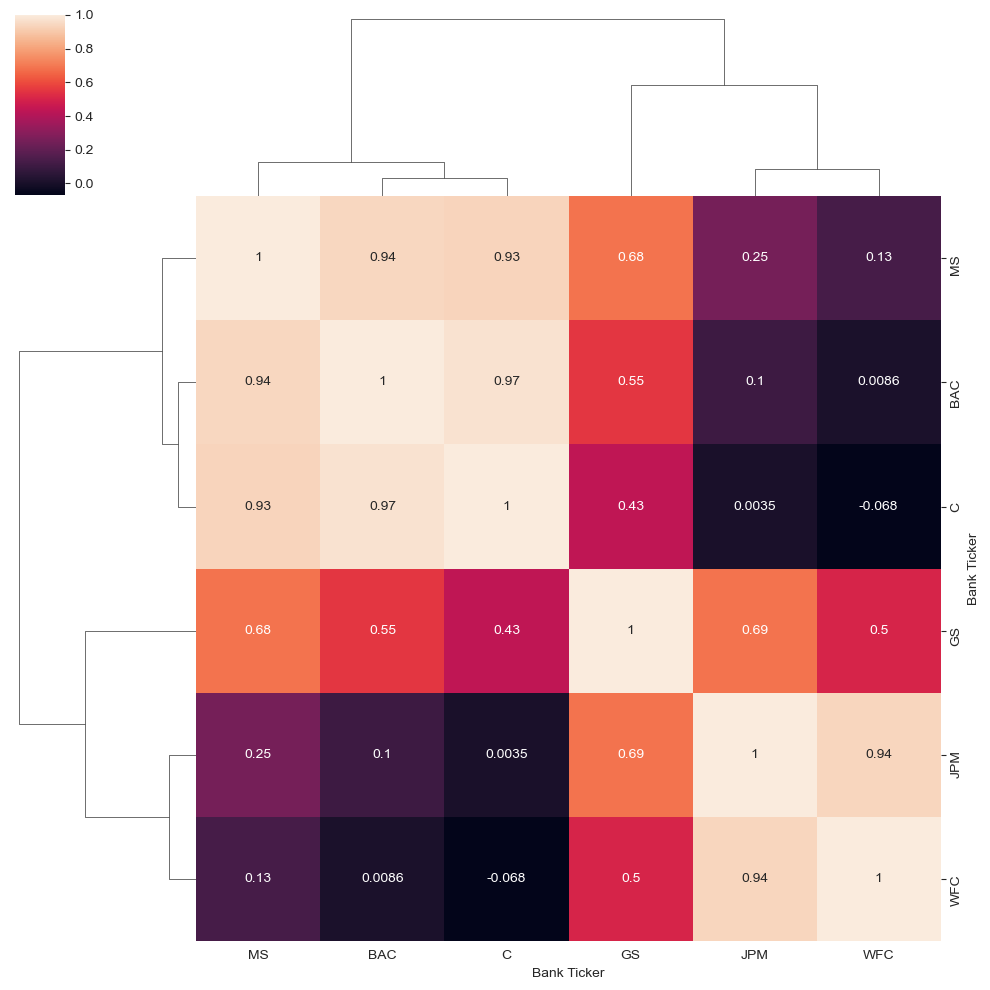

In [24]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Using Plotly's iplot() method to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016 **

In [25]:
bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].iplot(kind='candle')

** Using the ta_plot() method to create a simple moving averages plot of Morgan Stanley for the year 2015 **

In [26]:
bank_stocks.loc['2015-01-01':'2016-01-01']['MS']['Close'].ta_plot(study='sma',periods=[13,21,55])

** Using the ta_plot() method to create a bollinger band plot for Bank of America for the year 2015 **

In [27]:
bank_stocks.loc['2015-01-01':'2016-01-01']['BAC']['Close'].ta_plot(study='boll')